# `WeRateDogs` Trends and Findings

Using the `twitter_archive_master.csv` file I generated in the during my wrangling efforts, I import and choose a subset of the data for which we could perform analysis on.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

master_df = pd.DataFrame().from_csv('twitter_archive_master.csv')
dogs = master_df[master_df.p1_dog]
dogs = dogs[dogs.rating_denominator == 10]
low = .01
high = .99
quant = dogs.rating_numerator.quantile([low, high])
dogs = dogs[dogs.rating_numerator >= quant[low]]
dogs = dogs[dogs.rating_numerator <= quant[high]]

This subset consists of any observation in which `p1_dog` is `True` (that is, the image prediction's first guess is a dog) and whose `rating_denominator` is 10 (to remove tweets with inaccurate ratings due to parsing errors).  This leaves us with 1516 observations.  I then remove the observations whose `rating_numerator` are outliers (i.e., the bottom 1% and top 99% of observations).  This leaves us with 1505 observations.

Describing the `rating_numerator` numerically gave us the following results:

In [10]:
dogs.rating_numerator.describe()

count    1505.000000
mean       10.994020
std         1.597652
min         5.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

So we see that, on average, a dog is rated more than 10/10, making the humor in WeRateDog's scoring system rather apparent.

In [11]:
dogs.p1.value_counts().head()

golden_retriever      146
Labrador_retriever     97
Pembroke               87
Chihuahua              81
pug                    56
Name: p1, dtype: int64

Viewing the `p1` results, sorted by value counts, tells us that the most frequent dogs to be rated are either Golden Retrievers or Labrador Retrievers, with 146 and 97 observations respectfully.  Third place is given to the Pembroke, otherwise known as a Welsh Corgi, with 87 observations.

Visually, we can see how these ratings compare via a histogram:

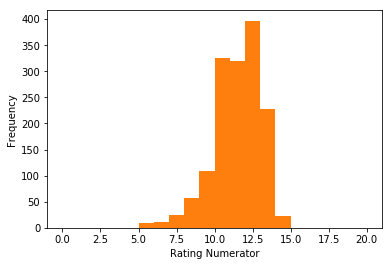

In [12]:
ax = dogs.rating_numerator.plot.hist(bins=range(0,21))
ax.set_xlabel("Rating Numerator")
plt.show()

Many more observations can be made, but a rather apparent trend is related to the average retweet and favorite and the rating.  We can plot the average retweet and favorite counts for each rating in the set:

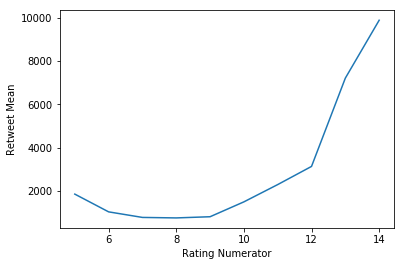

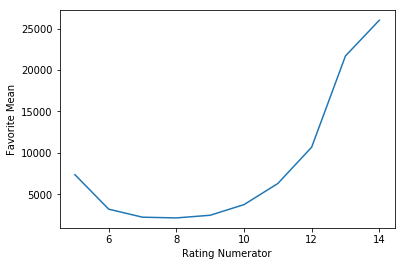

In [13]:
dog_rating_retweet = []
for rating in dogs.rating_numerator.value_counts().index:
    tweet_rating = dogs[dogs.rating_numerator == rating]
    data = {'Rating': rating, 
            'Retweet Mean': tweet_rating.retweet_count.mean(),
            'Favorite Mean': tweet_rating.favorite_count.mean()}
    dog_rating_retweet.append(data)
    
dog_rating_retweet_df = pd.DataFrame(dog_rating_retweet)
dog_rating_retweet_df = dog_rating_retweet_df.sort_values('Rating')

plt.plot(dog_rating_retweet_df['Rating'], dog_rating_retweet_df['Retweet Mean'])
plt.xlabel("Rating Numerator")
plt.ylabel("Retweet Mean")
plt.show()

plt.plot(dog_rating_retweet_df['Rating'], dog_rating_retweet_df['Favorite Mean'])
plt.xlabel("Rating Numerator")
plt.ylabel("Favorite Mean")
plt.show()

We see a very clear trend in which the higher the rating, the higher the retweet count and favorite count.  Perhaps WeRateDogs shares a similar taste in dogs as the majority of it's followers, or maybe it's ratings influence the opinions of it's followers.  In any case, it would seem a dog is more likley to have higher retweet and favorite counts if it is rated higher by WeRateDogs.